<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/RFECVCX_PIPIENS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
Cl = '/content/cx_pipiens.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,1,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,1,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,1,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
207,-6.03333

In [4]:
X = data.loc[:, data.columns != 'Cx_pipiens']
Y = data.Cx_pipiens

In [5]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,85,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,95,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,93,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
20

In [6]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
205    1
206    1
207    1
208    1
209    1
Name: Cx_pipiens, Length: 210, dtype: int64

In [7]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)

In [8]:
 from sklearn.feature_selection import SelectFromModel,RFECV
 from sklearn.model_selection import StratifiedKFold


# xgboost

In [9]:
rfecv1 = RFECV(XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=0.9,colsample_bytree=0.9),cv=StratifiedKFold(10))
rfecv1.fit(X,Y)
# check the support
rfecv1.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [10]:
# name wise features and count
feature_selected1 =  X.columns[rfecv1.get_support()]
feature_selected1

Index(['X_long', 'Y_lat', 'Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides',
       'Coniferes', 'ZoneAride', 'Autres',
       ...
       'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin', 'Vent_Juill',
       'Vent_Aout', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=188)

In [11]:
 x_rfe1=X[feature_selected1]

In [12]:
 x_rfe1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_cy_TempJ,Min_TempJ,Max_TempJ,Ph1_TempJ,Ph2_TempJ,Ph3_TempJ,Var_TempJ,Moy_TempN,...,Rad_Juin,Rad_Juill,Rad_Aout,Rad_Sept,Rad_Oct,Rad_Dec,Tmax_Janv,Tmax_Fev,Tmax_Avril,Tmax_Mai,Tmax_Juin,Tmax_Aout,Tmax_Sept,Tmax_Oct,Tmax_Dec,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,14905,96,83,7,30,53,14721,15012,672,347,203,6,14436,...,25088,23739,23115,20888,18177,13965,21.500000,21.799999,22.600000,23.200001,24.299999,26.200001,26.500000,26.000000,22.500000,14.8,15.7,15.6,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,1.91,2.07,2.18,2.16,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,15360,312,126,31,74,87,14941,15609,643,336,88,26,14516,...,24129,23135,22648,19999,17092,12663,21.900000,22.600000,24.600000,25.500000,27.100000,29.700001,29.200001,27.600000,22.600000,12.8,14.2,14.7,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,1.84,2.03,2.10,2.09,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,15360,312,126,31,74,87,14941,15609,643,336,88,26,14516,...,24129,23135,22648,19999,17092,12663,21.900000,22.600000,24.600000,25.500000,27.100000,29.700001,29.200001,27.600000,22.600000,12.8,14.2,14.7,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,1.84,2.03,2.10,2.09,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,15310,295,115,33,66,77,14918,15560,651,330,92,26,14526,...,23963,23035,22619,19925,17075,12635,22.000000,22.799999,24.700001,25.700001,27.299999,29.900000,29.400000,27.799999,22.900000,13.2,14.6,15.2,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,1.88,2.07,2.14,2.13,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,15266,299,121,23,73,85,14862,15507,634,340,80,25,14489,...,24059,23011,22580,19981,17107,12631,22.100000,22.799999,24.799999,25.700001,27.299999,29.900000,29.400000,27.799999,22.900000,13.0,14.3,14.9,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,1.87,2.06,2.14,2.12,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,100,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,14998,628,105,12,92,95,14373,15685,674,180,175,86,14246,...,26117,26926,24443,19445,14416,8270,14.700000,15.600000,20.600000,22.799999,27.400000,29.000000,25.799999,21.200001,14.500000,4.7,7.1,9.7,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,1.46,1.60,1.67,1.56,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,14,11,7,31,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,14747,538,85,13,91,9

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

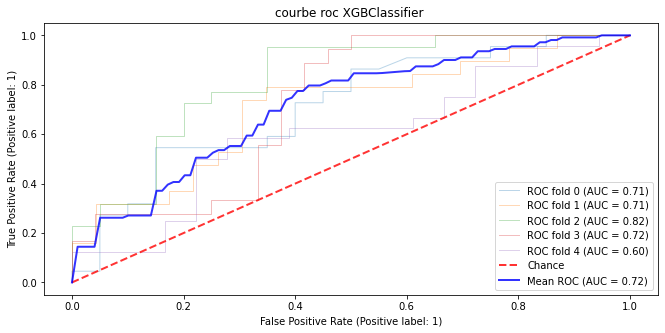

Accuracy: [0.66666667 0.66666667 0.76190476 0.64285714 0.61904762]
moy_accuracy: 0.67
precision: [0.66666667 0.63157895 0.8        0.57142857 0.7       ]
moy_precision: 0.67
sensibilité : [0.72727273 0.63157895 0.72727273 0.66666667 0.58333333]
moy_sensibilité: 0.67
spécificité : [0.6        0.69565217 0.8        0.625      0.66666667]
moy_spécificité: 0.68
MCC : [0.33028913 0.32723112 0.52727273 0.28867513 0.24771685]
MCC: 0.34
balanced_accuracy : [0.66363636 0.66361556 0.76363636 0.64583333 0.625     ]
balanced_accuracy: 0.67
roc_auc : [0.71477273 0.70938215 0.82272727 0.72453704 0.60416667]
roc_auc: 0.72
cohen_kappa_scorec : [0.32876712 0.32723112 0.52488688 0.28571429 0.24324324]
cohen_kappa_scorec: 0.34
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

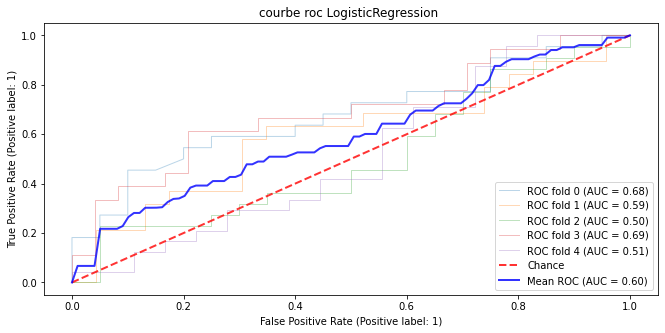

Accuracy: [0.5952381  0.64285714 0.47619048 0.66666667 0.45238095]
moy_accuracy: 0.57
precision: [0.60869565 0.61111111 0.5        0.6        0.52941176]
moy_precision: 0.57
sensibilité : [0.63636364 0.57894737 0.54545455 0.66666667 0.375     ]
moy_sensibilité: 0.56
spécificité : [0.55       0.69565217 0.4        0.66666667 0.55555556]
moy_spécificité: 0.57
MCC : [ 0.18700223  0.27618409 -0.05504819  0.33028913 -0.070014  ]
MCC: 0.13
balanced_accuracy : [0.59318182 0.63729977 0.47272727 0.66666667 0.46527778]
balanced_accuracy: 0.57
roc_auc : [0.67613636 0.59496568 0.50454545 0.68981481 0.49537037]
roc_auc: 0.59
cohen_kappa_scorec : [ 0.18678815  0.27586207 -0.05479452  0.32876712 -0.06622517]
cohen_kappa_scorec: 0.13
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

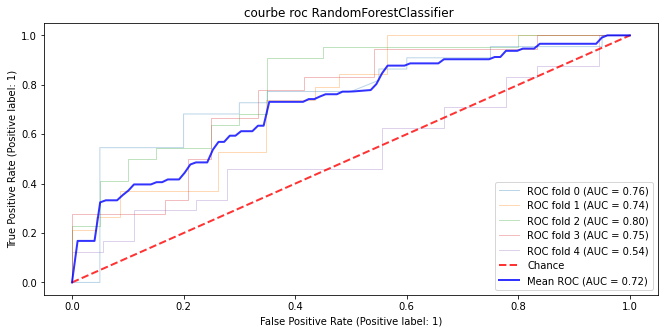

Accuracy: [0.69047619 0.5952381  0.76190476 0.71428571 0.47619048]
moy_accuracy: 0.65
precision: [0.70833333 0.55555556 0.73913043 0.59090909 0.52380952]
moy_precision: 0.62
sensibilité : [0.77272727 0.57894737 0.72727273 0.66666667 0.5       ]
moy_sensibilité: 0.65
spécificité : [0.6        0.65217391 0.8        0.58333333 0.5       ]
moy_spécificité: 0.63
MCC : [0.37924778 0.23112128 0.52272727 0.37284852 0.05504819]
MCC: 0.31
balanced_accuracy : [0.68863636 0.58924485 0.74090909 0.71527778 0.46527778]
balanced_accuracy: 0.64
roc_auc : [0.76022727 0.70938215 0.87272727 0.76157407 0.52777778]
roc_auc: 0.73
cohen_kappa_scorec : [ 0.37528604  0.17931034  0.5752809   0.37241379 -0.0137931 ]
cohen_kappa_scorec: 0.30
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

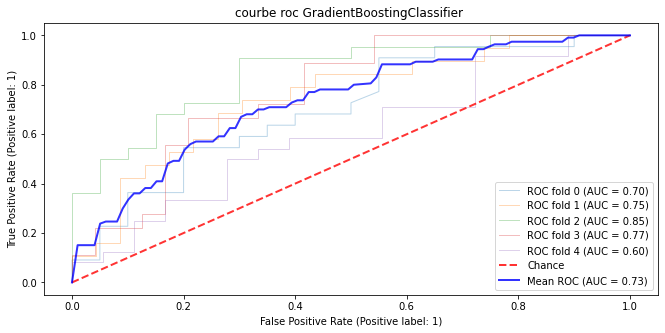

Accuracy: [0.64285714 0.71428571 0.73809524 0.64285714 0.5952381 ]
moy_accuracy: 0.67
precision: [0.66666667 0.68421053 0.76190476 0.56521739 0.70588235]
moy_precision: 0.68
sensibilité : [0.63636364 0.68421053 0.72727273 0.72222222 0.5       ]
moy_sensibilité: 0.65
spécificité : [0.65       0.73913043 0.75       0.58333333 0.72222222]
moy_spécificité: 0.69
MCC : [0.28603878 0.42334096 0.47673129 0.3038025  0.22404481]
MCC: 0.34
balanced_accuracy : [0.64318182 0.71167048 0.73863636 0.65277778 0.61111111]
balanced_accuracy: 0.67
roc_auc : [0.70340909 0.74828375 0.84772727 0.77083333 0.59953704]
roc_auc: 0.73
cohen_kappa_scorec : [0.28571429 0.42334096 0.47619048 0.29530201 0.21192053]
cohen_kappa_scorec: 0.34
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

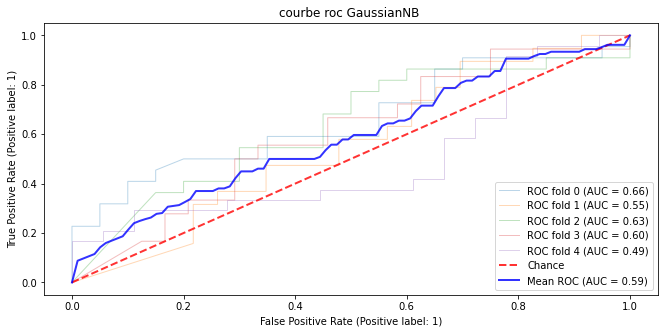

Accuracy: [0.57142857 0.57142857 0.61904762 0.5952381  0.47619048]
moy_accuracy: 0.57
precision: [0.61111111 0.54545455 0.60714286 0.54545455 0.58333333]
moy_precision: 0.58
sensibilité : [0.5        0.31578947 0.77272727 0.33333333 0.29166667]
moy_sensibilité: 0.44
spécificité : [0.65       0.7826087  0.45       0.79166667 0.72222222]
moy_spécificité: 0.68
MCC : [0.15138252 0.11139111 0.23596995 0.14069371 0.01521452]
MCC: 0.13
balanced_accuracy : [0.575      0.54919908 0.61136364 0.5625     0.50694444]
balanced_accuracy: 0.56
roc_auc : [0.65568182 0.55491991 0.63409091 0.60069444 0.49305556]
roc_auc: 0.59
cohen_kappa_scorec : [0.14864865 0.10213777 0.22580645 0.13138686 0.01282051]
cohen_kappa_scorec: 0.12
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

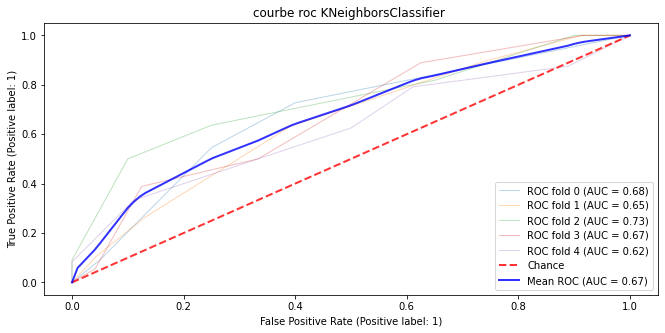

Accuracy: [0.66666667 0.61904762 0.69047619 0.5952381  0.57142857]
moy_accuracy: 0.63
precision: [0.66666667 0.57142857 0.73684211 0.52941176 0.625     ]
moy_precision: 0.63
sensibilité : [0.72727273 0.63157895 0.63636364 0.5        0.625     ]
moy_sensibilité: 0.62
spécificité : [0.6        0.60869565 0.75       0.66666667 0.5       ]
moy_spécificité: 0.63
MCC : [0.33028913 0.23918244 0.38768756 0.16803361 0.125     ]
MCC: 0.25
balanced_accuracy : [0.66363636 0.6201373  0.69318182 0.58333333 0.5625    ]
balanced_accuracy: 0.62
roc_auc : [0.67954545 0.65217391 0.73295455 0.67361111 0.62384259]
roc_auc: 0.67
cohen_kappa_scorec : [0.32876712 0.23809524 0.38374718 0.16783217 0.125     ]
cohen_kappa_scorec: 0.25


In [14]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5) }
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe1, Y)):
         clf.fit( x_rfe1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe1, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe1, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe1, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

In [15]:
rfecv2 = RFECV(XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9,colsample_bytree=0.9),cv=StratifiedKFold(10))
rfecv2.fit(X,Y)
# check the support
rfecv2.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False,

In [16]:
# name wise features and count
feature_selected2 =  X.columns[rfecv2.get_support()]
feature_selected2

Index(['X_long', 'Y_lat', 'Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides',
       'Arbrisseau', 'VegCul', 'Moy_IRM',
       ...
       'Tmax_Janv', 'Tmax_Fev', 'Tmax_Avril', 'Tmax_Mai', 'Tmin_Juill',
       'Vap_Juill', 'Vent_Mars', 'Vent_Avril', 'Vent_Sept', 'Vent_Nov'],
      dtype='object', length=102)

In [17]:
 x_rfe2=X[feature_selected2]

In [18]:
 x_rfe2

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Arbrisseau,VegCul,Moy_IRM,Amp1_IRM,Amp2_IRM,VarT_ann_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Amp2_TempJ,Amp3_TempJ,VarT_cy_TempJ,Min_TempJ,Ph3_TempJ,Var_TempJ,Moy_TempN,Amp2_TempN,Min_TempN,Max_TempN,Ph1_TempN,Ph2_TempN,Ph3_TempN,Moy_NDVI,Amp1_NDVI,VarT_ann_NDVI,VarT_bi_NDVI,VarT_cy_NDVI,Min_NDVI,Ph1_NDVI,Ph3_NDVI,...,Geom_Shan,Geom_unif,Rugosite_sd,Pente_Moyenne,Pente_Min,IPT_Med,IPT_Min,IPT_Moy,IPT_sd,IR_Min,IR_sd,RV_Min,RV_Moy,Bio_Tj_Moy,Isoth,Bio_Tmax,Bio_Tint,Bio_Thum_Moy,Bio_Tsec_Moy,Bio_Tch_Moy,Bio_Pre_Ann,Bio_Pre_hum,Bio_Pre_Saison,Prec_Avril,Rad_Fev,Rad_Avril,Rad_Mai,Rad_Juill,Rad_Aout,Rad_Sept,Tmax_Janv,Tmax_Fev,Tmax_Avril,Tmax_Mai,Tmin_Juill,Vap_Juill,Vent_Mars,Vent_Avril,Vent_Sept,Vent_Nov
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,0,3340,570,110,47,49,2690,3950,566,160,231,83,7,53,14721,203,6,14436,44,14309,14561,768,325,151,1106,5,2,1,3,1097,953,166,...,0.482578,0.579282,2.290435,0.353506,0.123749,-0.1875,-1.750,0.375000,1.531569,0.625,0.899761,0.000009,0.000033,7.125000,59.375002,26.500000,12.000000,22.050000,19.866667,22.600000,48,15,105.140599,1,17773,23683,24920,23739,23115,20888,21.500000,21.799999,22.600000,23.200001,18.000000,2.07,6.1,6.9,6.3,5.5
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,0,4010,660,10,73,73,3350,4660,581,33,49,126,31,87,14941,88,26,14516,55,14311,14705,721,321,104,1082,6,13,1,14,1076,137,171,...,0.000000,1.000000,1.268611,0.296103,0.043752,-0.5000,-2.125,-0.281250,1.125434,0.875,0.397748,0.000002,0.000008,9.816667,55.461394,29.700001,17.700001,20.200000,22.166667,24.266667,29,8,77.394709,1,16620,22794,24082,23135,22648,19999,21.900000,22.600000,24.600000,25.500000,18.799999,2.03,4.8,5.6,5.7,3.7
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,0,4010,660,10,73,73,3350,4660,581,33,49,126,31,87,14941,88,26,14516,55,14311,14705,721,321,104,1082,6,13,1,14,1076,137,171,...,0.000000,1.000000,1.268611,0.296103,0.043752,-0.5000,-2.125,-0.281250,1.125434,0.875,0.397748,0.000002,0.000008,9.816667,55.461394,29.700001,17.700001,20.200000,22.166667,24.266667,29,8,77.394709,1,16620,22794,24082,23135,22648,19999,21.900000,22.600000,24.600000,25.500000,18.799999,2.03,4.8,5.6,5.7,3.7
3,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,0,3000,590,70,18,18,2350,3540,577,185,64,115,33,77,14918,92,26,14526,58,14309,14719,722,319,112,1060,5,1,0,1,1049,474,123,...,1.391740,0.109761,11.361772,1.323598,0.333201,-3.7500,-7.250,-3.468750,3.097851,2.375,3.913587,0.000150,0.000396,9.616666,54.952379,29.900000,17.500000,20.500000,22.433334,24.500000,26,8,79.471941,1,16615,22726,24002,23035,22619,19925,22.000000,22.799999,24.700001,25.700001,19.100000,2.07,5.0,5.2,5.6,3.6
4,-13.207000,27.165000,0.000000,0.000000,0.000000,0.000000,0.299265,0,0,2490,520,50,44,44,1920,3010,612,202,202,121,23,85,14862,80,25,14489,61,14294,14660,712,333,109,1081,2,0,1,1,1076,312,39,...,0.986899,0.360532,4.520785,2.738370,1.701891,-0.6250,-6.125,-0.562500,3.525299,5.625,1.496415,0.000018,0.000118,9.883333,55.838041,29.900000,17.700000,20.400000,22.316666,24.416666,28,8,80.226951,1,16646,22765,24067,23011,22580,19981,22.100000,22.799999,24.799999,25.700001,18.900000,2.06,5.1,5.6,5.7,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,11.136305,139.052841,8.974447,27.155428,0.614620,0,100,1910,470,130,66,73,1480,2470,782,123,212,105,12,95,14373,175,86,14246,54,13907,14676,687,135,389,1393,137,71,5,78,1261,239,370,...,0.974315,0.217593,9.353934,7.950303,6.155148,-2.7500,-14.125,-3.039062,6.242138,19.875,3.542768,0.000195,0.000651,9.391667,36.686198,29.400000,25.600000,10.650000,24.150000,2

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

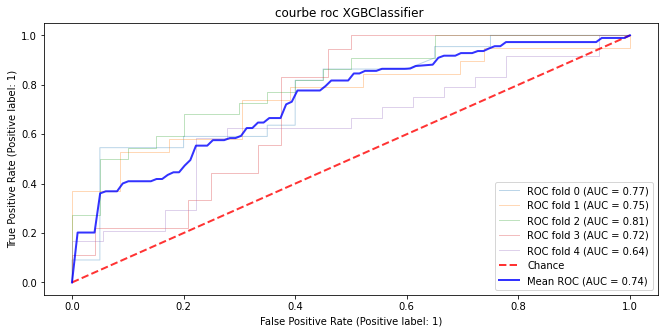

Accuracy: [0.66666667 0.64285714 0.71428571 0.66666667 0.64285714]
moy_accuracy: 0.67
precision: [0.66666667 0.61111111 0.75       0.59090909 0.73684211]
moy_precision: 0.67
sensibilité : [0.72727273 0.57894737 0.68181818 0.72222222 0.58333333]
moy_sensibilité: 0.66
spécificité : [0.6        0.69565217 0.75       0.625      0.72222222]
moy_spécificité: 0.68
MCC : [0.33028913 0.27618409 0.43181818 0.34405118 0.3038025 ]
MCC: 0.34
balanced_accuracy : [0.66363636 0.63729977 0.71590909 0.67361111 0.65277778]
balanced_accuracy: 0.67
roc_auc : [0.76704545 0.75286041 0.80909091 0.72453704 0.63657407]
roc_auc: 0.74
cohen_kappa_scorec : [0.32876712 0.27586207 0.42986425 0.33783784 0.29530201]
cohen_kappa_scorec: 0.33
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

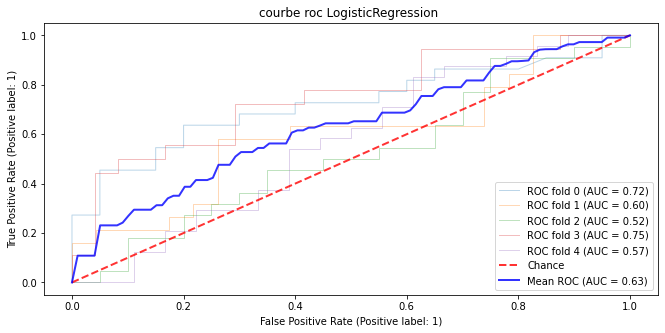

Accuracy: [0.69047619 0.64285714 0.52380952 0.64285714 0.57142857]
moy_accuracy: 0.61
precision: [0.73684211 0.61111111 0.54545455 0.56       0.63636364]
moy_precision: 0.62
sensibilité : [0.63636364 0.57894737 0.54545455 0.77777778 0.58333333]
moy_sensibilité: 0.62
spécificité : [0.75       0.69565217 0.5        0.54166667 0.55555556]
moy_spécificité: 0.61
MCC : [0.38768756 0.27618409 0.04545455 0.32206442 0.13762047]
MCC: 0.23
balanced_accuracy : [0.69318182 0.63729977 0.52272727 0.65972222 0.56944444]
balanced_accuracy: 0.62
roc_auc : [0.72159091 0.5583524  0.52954545 0.73842593 0.56712963]
roc_auc: 0.62
cohen_kappa_scorec : [0.38374718 0.27586207 0.04545455 0.30463576 0.1369863 ]
cohen_kappa_scorec: 0.23
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

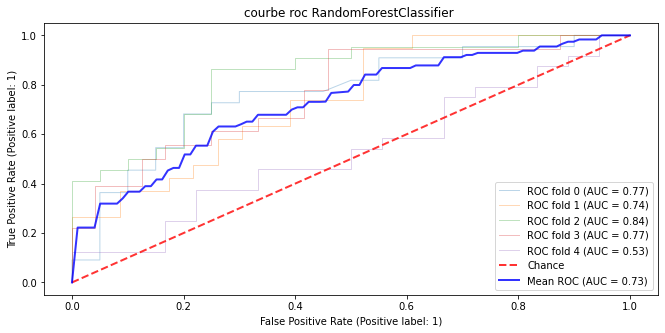

Accuracy: [0.69047619 0.66666667 0.73809524 0.69047619 0.52380952]
moy_accuracy: 0.66
precision: [0.73913043 0.6        0.76190476 0.68421053 0.6       ]
moy_precision: 0.68
sensibilité : [0.77272727 0.63157895 0.72727273 0.72222222 0.5       ]
moy_sensibilité: 0.67
spécificité : [0.7        0.65217391 0.8        0.70833333 0.55555556]
moy_spécificité: 0.68
MCC : [0.47637221 0.28278387 0.47673129 0.40046693 0.04128614]
MCC: 0.34
balanced_accuracy : [0.73636364 0.61098398 0.74090909 0.68055556 0.50694444]
balanced_accuracy: 0.66
roc_auc : [0.78295455 0.73913043 0.84545455 0.79398148 0.5625    ]
roc_auc: 0.74
cohen_kappa_scorec : [0.42465753 0.22401848 0.52272727 0.33783784 0.        ]
cohen_kappa_scorec: 0.30
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

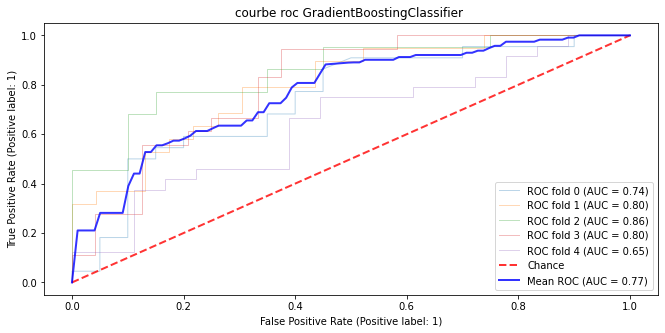

Accuracy: [0.66666667 0.71428571 0.76190476 0.73809524 0.54761905]
moy_accuracy: 0.69
precision: [0.68181818 0.70588235 0.77272727 0.65217391 0.63157895]
moy_precision: 0.69
sensibilité : [0.68181818 0.63157895 0.77272727 0.83333333 0.5       ]
moy_sensibilité: 0.68
spécificité : [0.65       0.7826087  0.75       0.66666667 0.61111111]
moy_spécificité: 0.69
MCC : [0.33181818 0.4199943  0.52272727 0.49713136 0.11047364]
MCC: 0.38
balanced_accuracy : [0.66590909 0.70709382 0.76136364 0.75       0.55555556]
balanced_accuracy: 0.69
roc_auc : [0.74204545 0.798627   0.85681818 0.80324074 0.64583333]
roc_auc: 0.77
cohen_kappa_scorec : [0.33181818 0.41801386 0.52272727 0.48322148 0.10738255]
cohen_kappa_scorec: 0.37
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

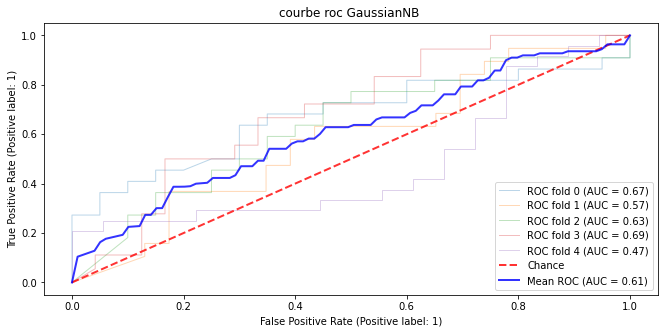

Accuracy: [0.64285714 0.5952381  0.54761905 0.69047619 0.4047619 ]
moy_accuracy: 0.58
precision: [0.68421053 0.6        0.54545455 0.69230769 0.46666667]
moy_precision: 0.60
sensibilité : [0.59090909 0.31578947 0.81818182 0.5        0.29166667]
moy_sensibilité: 0.50
spécificité : [0.7        0.82608696 0.25       0.83333333 0.55555556]
moy_spécificité: 0.63
MCC : [ 0.29190593  0.16579674  0.08298827  0.35682062 -0.15778821]
MCC: 0.15
balanced_accuracy : [0.64545455 0.57093822 0.53409091 0.66666667 0.42361111]
balanced_accuracy: 0.57
roc_auc : [0.67159091 0.57437071 0.62954545 0.69097222 0.47453704]
roc_auc: 0.61
cohen_kappa_scorec : [ 0.28893905  0.14797136  0.06993007  0.34532374 -0.14379085]
cohen_kappa_scorec: 0.14
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

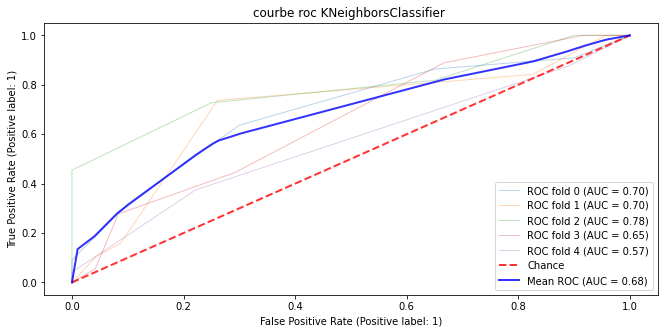

Accuracy: [0.66666667 0.73809524 0.73809524 0.5952381  0.54761905]
moy_accuracy: 0.66
precision: [0.7        0.7        0.76190476 0.53333333 0.61904762]
moy_precision: 0.66
sensibilité : [0.63636364 0.73684211 0.72727273 0.44444444 0.54166667]
moy_sensibilité: 0.62
spécificité : [0.7        0.73913043 0.75       0.70833333 0.55555556]
moy_spécificité: 0.69
MCC : [0.33636364 0.47434713 0.47673129 0.15778821 0.09622504]
MCC: 0.31
balanced_accuracy : [0.66818182 0.73798627 0.73863636 0.57638889 0.54861111]
balanced_accuracy: 0.65
roc_auc : [0.69545455 0.69565217 0.78409091 0.65277778 0.56712963]
roc_auc: 0.68
cohen_kappa_scorec : [0.33484163 0.4738041  0.47619048 0.15602837 0.0952381 ]
cohen_kappa_scorec: 0.31


In [19]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5) }
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe2, Y)):
         clf.fit( x_rfe2.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe2.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe2, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe2, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe2, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe2, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe2, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# logistique

In [22]:
rfecv3 = RFECV(LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),cv=StratifiedKFold(10))
rfecv3.fit(X,Y)
# check the support
rfecv3.get_support()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/l

array([False, False,  True,  True,  True,  True, False, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,

In [23]:
# name wise features and count
feature_selected3 =  X.columns[rfecv3.get_support()]
feature_selected3

Index(['Bovins', 'Volaille', 'Caprins', 'Ovins', 'Lesfeuillus', 'Arbrisseau',
       'Pl_herb', 'VegCul', 'ZoneUrbaine', 'Moy_IRM',
       ...
       'Rad_Fev', 'Rad_Mars', 'Rad_Avril', 'Rad_Juin', 'Rad_Juill', 'Rad_Aout',
       'Rad_Sept', 'Rad_Oct', 'Rad_Nov', 'Rad_Dec'],
      dtype='object', length=103)

In [24]:
 x_rfe3=X[feature_selected3]

In [25]:
 x_rfe3

,Bovins,Volaille,Caprins,Ovins,Lesfeuillus,Arbrisseau,Pl_herb,VegCul,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_cy_TempJ,Min_TempJ,Max_TempJ,Ph2_TempJ,Ph3_TempJ,Var_TempJ,Moy_TempN,Amp1_TempN,Amp2_TempN,Min_TempN,Ph2_TempN,Ph3_TempN,Var_TempN,Moy_NDVI,Amp1_NDVI,Amp2_NDVI,Amp3_NDVI,...,Elev_Min,Elev_Moy,Rugosite_Max,Rugosite_Moyenne,Rugosite_Min,Rugosite_Moy,Rugosite_sd,Pente_Max,Pente_Moyenne,Pente_Min,Pente_Moy,IPT_Max,IPT_Med,IPT_Moy,IR_Max,IR_Med,IR_Min,IR_Moy,Bio_Saison,Bio_Pre_Ann,Bio_Pre_Qhum,Bio_Pre_Qfr,Prec_Janv,Prec_Fev,Prec_Mars,Prec_Avril,Prec_Mai,Prec_Juin,Prec_Oct,Prec_Dec,Rad_Fev,Rad_Mars,Rad_Avril,Rad_Juin,Rad_Juill,Rad_Aout,Rad_Sept,Rad_Oct,Rad_Nov,Rad_Dec
0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,3340,570,110,50,47,49,2690,3950,566,160,231,83,7,30,53,14721,15012,347,203,6,14436,102,44,14309,325,151,3,1106,5,4,2,...,0,5.7500,9,5.0,3,5.5625,2.290435,1.043530,0.353506,0.123749,0.459993,2.875,-0.1875,0.375000,3.375,1.6250,0.625,1.968750,172.263782,48,22,19,2,2,1,1,1,0,3,15,17773,21276,23683,25088,23739,23115,20888,18177,15480,13965
1,0.000214,0.000000,0.063449,0.034352,0,0,0,0,0,4010,660,10,50,73,73,3350,4660,581,33,49,126,31,74,87,14941,15609,336,88,26,14516,176,55,14311,321,104,9,1082,6,2,1,...,60,69.1250,8,4.0,2,3.8750,1.268611,0.526827,0.296103,0.043752,0.293817,2.000,-0.5000,-0.281250,2.125,1.3750,0.875,1.375000,271.167506,29,18,14,3,3,2,1,0,1,3,8,16620,19997,22794,24129,23135,22648,19999,17092,13866,12663
2,0.000214,0.000000,0.063449,0.034352,0,0,0,0,0,4010,660,10,50,73,73,3350,4660,581,33,49,126,31,74,87,14941,15609,336,88,26,14516,176,55,14311,321,104,9,1082,6,2,1,...,60,69.1250,8,4.0,2,3.8750,1.268611,0.526827,0.296103,0.043752,0.293817,2.000,-0.5000,-0.281250,2.125,1.3750,0.875,1.375000,271.167506,29,18,14,3,3,2,1,0,1,3,8,16620,19997,22794,24129,23135,22648,19999,17092,13866,12663
3,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,3000,590,70,10,18,18,2350,3540,577,185,64,115,33,66,77,14918,15560,330,92,26,14526,182,58,14309,319,112,9,1060,5,4,2,...,-49,16.9375,43,18.0,8,22.3125,11.361772,4.500561,1.323598,0.333201,1.974215,4.125,-3.7500,-3.468750,15.125,6.1250,2.375,7.515625,269.473410,26,17,13,3,2,1,1,0,1,3,8,16615,19999,22726,23963,23035,22619,19925,17075,13811,12635
4,0.000000,0.000000,0.000000,0.000000,0,0,0,0,26,2490,520,50,30,44,44,1920,3010,612,202,202,121,23,73,85,14862,15507,340,80,25,14489,156,61,14294,333,109,8,1081,2,4,1,...,12,37.2500,34,27.0,18,25.7500,4.520785,3.416714,2.738370,1.701891,2.695184,4.750,-0.6250,-0.562500,11.000,8.7500,5.625,8.593750,269.102032,28,18,14,3,3,1,1,0,1,3,8,16646,20004,22765,24059,23011,22580,19981,17107,13810,12631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,11.136305,139.052841,8.974447,27.155428,0,0,0,100,0,1910,470,130,70,66,73,1480,2470,782,123,212,105,12,92,95,14373,15685,180,175,86,14246,382,54,13907,135,389,32,1393,137,36,21,...,482,558.3750,96,83.5,62,79.4375,9.353934,10.078780,7.950303,6.155148,8.070340,8.750,-2.7500,-3.039062,32.375,26.6875,19.875,26.226562,576.137048,836,439,429,151,138,150,56,33,7,47,140,12293,15857,20173,26117,26926,24443,19445,14416,10108,8270
206,24.167864,101.951973,6.131610,13.230689,23,11,7,31,0,1790,300,70,20,67,71,1450,2080,610,216,377,85,13,91,93,14215,15327,182,386,64,14213,356,55,13903,119,298,29,1518,42,25,6,...,595,839.1250,303,243.5,148,231.6875,53.449413,30.126017,22.598034,7.233225,21.158220,73.625,13.0625,19.789062,109.250,77.4375,44.625,77.507812,573.276565,899,463,430,144,155,164,70,40,9,56,131,12178,15666,19985,25883,26623,24190,19089,14158,10116,8299
207,2.164068,117.797806,0.460241,4.490880,0,18,13,1,32,1830,540,60,60

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

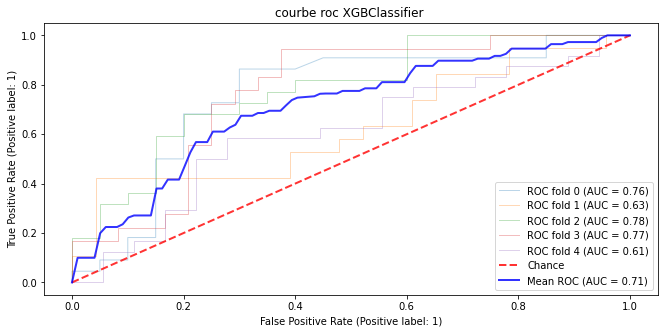

Accuracy: [0.73809524 0.57142857 0.73809524 0.73809524 0.5952381 ]
moy_accuracy: 0.68
precision: [0.76190476 0.52631579 0.78947368 0.65217391 0.65217391]
moy_precision: 0.68
sensibilité : [0.72727273 0.52631579 0.68181818 0.83333333 0.625     ]
moy_sensibilité: 0.68
spécificité : [0.75       0.60869565 0.8        0.66666667 0.55555556]
moy_spécificité: 0.68
MCC : [0.47673129 0.13501144 0.48346919 0.49713136 0.17951966]
MCC: 0.35
balanced_accuracy : [0.73863636 0.56750572 0.74090909 0.75       0.59027778]
balanced_accuracy: 0.68
roc_auc : [0.75568182 0.62700229 0.77954545 0.76851852 0.60648148]
roc_auc: 0.71
cohen_kappa_scorec : [0.47619048 0.13501144 0.4785553  0.48322148 0.17931034]
cohen_kappa_scorec: 0.35
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

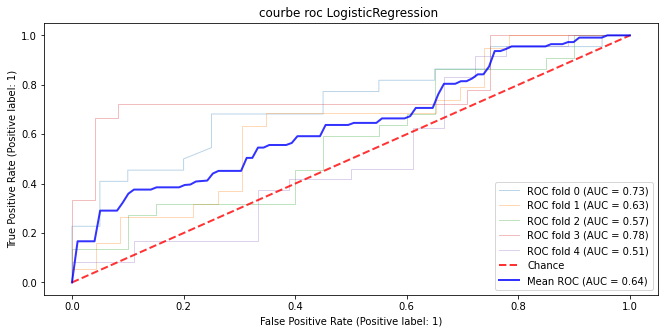

Accuracy: [0.71428571 0.64285714 0.57142857 0.73809524 0.5       ]
moy_accuracy: 0.63
precision: [0.75       0.61111111 0.59090909 0.68421053 0.58823529]
moy_precision: 0.64
sensibilité : [0.68181818 0.57894737 0.59090909 0.72222222 0.41666667]
moy_sensibilité: 0.60
spécificité : [0.75       0.69565217 0.55       0.75       0.61111111]
moy_spécificité: 0.67
MCC : [0.43181818 0.27618409 0.14090909 0.46951295 0.0280056 ]
MCC: 0.27
balanced_accuracy : [0.71590909 0.63729977 0.57045455 0.73611111 0.51388889]
balanced_accuracy: 0.63
roc_auc : [0.72613636 0.63386728 0.57272727 0.77546296 0.51388889]
roc_auc: 0.64
cohen_kappa_scorec : [0.42986425 0.27586207 0.14090909 0.46896552 0.02649007]
cohen_kappa_scorec: 0.27
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

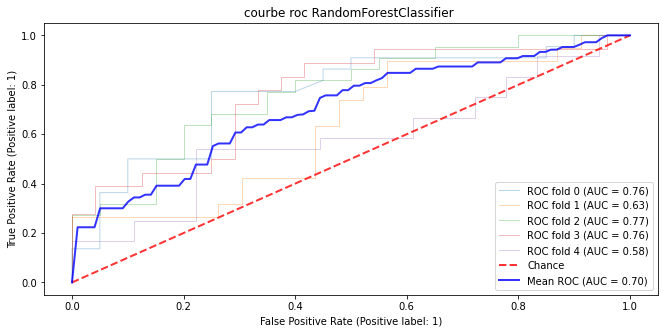

Accuracy: [0.69047619 0.52380952 0.69047619 0.66666667 0.52380952]
moy_accuracy: 0.62
precision: [0.7        0.5        0.75       0.59090909 0.63636364]
moy_precision: 0.64
sensibilité : [0.68181818 0.47368421 0.63636364 0.66666667 0.58333333]
moy_sensibilité: 0.61
spécificité : [0.7        0.60869565 0.7        0.66666667 0.38888889]
moy_spécificité: 0.61
MCC : [0.33636364 0.03016534 0.38768756 0.31944444 0.02777778]
MCC: 0.22
balanced_accuracy : [0.73863636 0.54118993 0.67272727 0.63888889 0.54166667]
balanced_accuracy: 0.63
roc_auc : [0.76704545 0.62242563 0.75909091 0.75231481 0.60648148]
roc_auc: 0.70
cohen_kappa_scorec : [ 0.38095238 -0.0137931   0.33783784  0.32876712  0.19047619]
cohen_kappa_scorec: 0.24
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

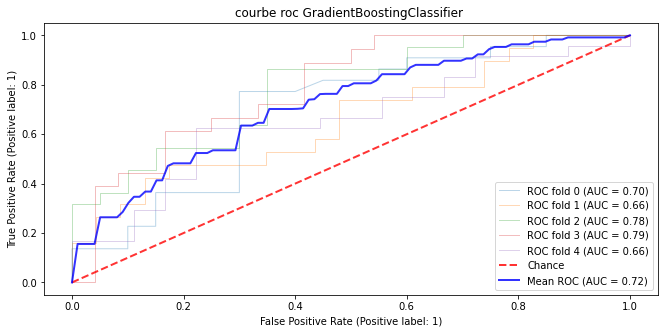

Accuracy: [0.64285714 0.57142857 0.61904762 0.64285714 0.69047619]
moy_accuracy: 0.63
precision: [0.68421053 0.52941176 0.66666667 0.56521739 0.78947368]
moy_precision: 0.65
sensibilité : [0.59090909 0.47368421 0.54545455 0.72222222 0.625     ]
moy_sensibilité: 0.59
spécificité : [0.7        0.65217391 0.7        0.58333333 0.77777778]
moy_spécificité: 0.68
MCC : [0.29190593 0.12762258 0.24771685 0.3038025  0.40046693]
MCC: 0.27
balanced_accuracy : [0.64545455 0.56292906 0.62272727 0.65277778 0.70138889]
balanced_accuracy: 0.64
roc_auc : [0.70340909 0.65675057 0.78181818 0.79166667 0.65972222]
roc_auc: 0.72
cohen_kappa_scorec : [0.28893905 0.12702079 0.24324324 0.29530201 0.38926174]
cohen_kappa_scorec: 0.27
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

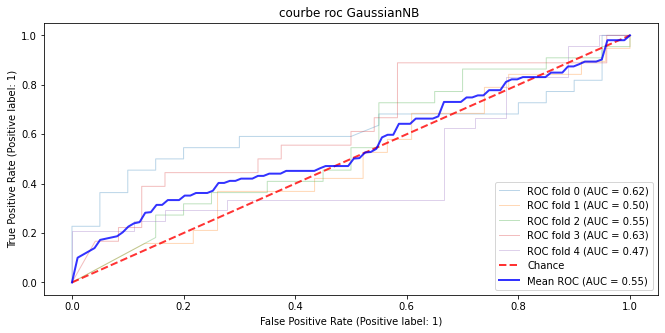

Accuracy: [0.66666667 0.5        0.52380952 0.64285714 0.5       ]
moy_accuracy: 0.57
precision: [0.78571429 0.4        0.54166667 0.63636364 0.63636364]
moy_precision: 0.60
sensibilité : [0.5        0.21052632 0.59090909 0.38888889 0.29166667]
moy_sensibilité: 0.40
spécificité : [0.85       0.73913043 0.45       0.83333333 0.77777778]
moy_spécificité: 0.73
MCC : [ 0.37080992 -0.0588311   0.04128614  0.25012216  0.07816317]
MCC: 0.14
balanced_accuracy : [0.675      0.47482838 0.52045455 0.61111111 0.53472222]
balanced_accuracy: 0.56
roc_auc : [0.61704545 0.49542334 0.55       0.62847222 0.47222222]
roc_auc: 0.55
cohen_kappa_scorec : [ 0.34375    -0.05250597  0.04109589  0.23357664  0.06369427]
cohen_kappa_scorec: 0.13
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

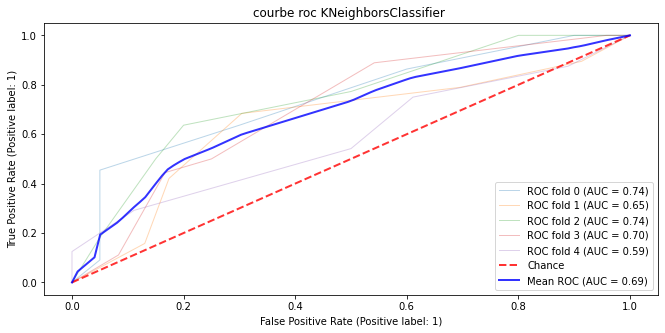

Accuracy: [0.66666667 0.69047619 0.71428571 0.64285714 0.52380952]
moy_accuracy: 0.65
precision: [0.7        0.65       0.77777778 0.6        0.59090909]
moy_precision: 0.66
sensibilité : [0.63636364 0.68421053 0.63636364 0.5        0.54166667]
moy_sensibilité: 0.60
spécificité : [0.7        0.69565217 0.8        0.75       0.5       ]
moy_spécificité: 0.69
MCC : [0.33636364 0.3785655  0.44038551 0.25819889 0.04128614]
MCC: 0.29
balanced_accuracy : [0.66818182 0.68993135 0.71818182 0.625      0.52083333]
balanced_accuracy: 0.64
roc_auc : [0.74318182 0.64874142 0.74431818 0.70486111 0.58680556]
roc_auc: 0.69
cohen_kappa_scorec : [0.33484163 0.37813212 0.43243243 0.25531915 0.04109589]
cohen_kappa_scorec: 0.29


In [26]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5) }
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe3, Y)):
         clf.fit( x_rfe3.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe3.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe3, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe3, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe3, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe3, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe3, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# Randomforest

In [27]:
rfecv4 = RFECV(RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),cv=StratifiedKFold(10))
rfecv4.fit(X,Y)
# check the support
rfecv4.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,

In [28]:
# name wise features and count
feature_selected4 =  X.columns[rfecv4.get_support()]
feature_selected4

Index(['X_long', 'Y_lat', 'Bovins', 'Caprins', 'Ovins', 'Equides', 'VegCul',
       'Moy_IRM', 'Amp1_IRM', 'Amp3_IRM',
       ...
       'Vent_Janv', 'Vent_Fev', 'Vent_Mars', 'Vent_Avril', 'Vent_Mai',
       'Vent_Juin', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=164)

In [29]:
 x_rfe4=X[feature_selected4]

In [30]:
 x_rfe4

,X_long,Y_lat,Bovins,Caprins,Ovins,Equides,VegCul,Moy_IRM,Amp1_IRM,Amp3_IRM,VarT_ann_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph2_IRM,Ph3_IRM,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_cy_TempJ,Min_TempJ,Max_TempJ,Ph1_TempJ,Ph3_TempJ,Var_TempJ,Moy_TempN,Amp1_TempN,Amp2_TempN,Min_TempN,Max_TempN,Ph1_TempN,Ph2_TempN,Ph3_TempN,Moy_NDVI,Amp1_NDVI,Amp2_NDVI,Amp3_NDVI,VarT_ann_NDVI,VarT_cy_NDVI,...,Rad_Aout,Rad_Sept,Rad_Oct,Rad_Nov,Rad_Dec,Tmax_Janv,Tmax_Fev,Tmax_Mars,Tmax_Avril,Tmax_Mai,Tmax_Juin,Tmax_Juill,Tmax_Aout,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Vap_Janv,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.624435,0,3340,570,50,47,49,2690,3950,160,231,96,83,7,30,53,14721,15012,672,203,6,14436,102,44,14309,14561,768,325,151,1106,5,4,2,2,3,...,23115,20888,18177,15480,13965,21.500000,21.799999,22.700001,22.600000,23.200001,24.299999,25.200001,26.200001,26.500000,26.000000,24.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,1.31,2.07,2.18,2.16,1.47,4.8,5.6,6.1,6.9,7.2,7.1,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.063449,0.034352,0.040295,0,4010,660,50,73,73,3350,4660,33,49,312,126,31,74,87,14941,15609,643,88,26,14516,176,55,14311,14705,721,321,104,1082,6,2,1,13,14,...,22648,19999,17092,13866,12663,21.900000,22.600000,24.000000,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,1.18,2.03,2.10,2.09,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.063449,0.034352,0.040295,0,4010,660,50,73,73,3350,4660,33,49,312,126,31,74,87,14941,15609,643,88,26,14516,176,55,14311,14705,721,321,104,1082,6,2,1,13,14,...,22648,19999,17092,13866,12663,21.900000,22.600000,24.000000,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,1.18,2.03,2.10,2.09,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,0.000000,0.000000,0.000000,0.379107,0,3000,590,10,18,18,2350,3540,185,64,295,115,33,66,77,14918,15560,651,92,26,14526,182,58,14309,14719,722,319,112,1060,5,4,2,1,1,...,22619,19925,17075,13811,12635,22.000000,22.799999,24.100000,24.700001,25.700001,27.299999,28.700001,29.900000,29.400000,27.799999,25.299999,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,1.20,2.07,2.14,2.13,1.41,4.2,4.2,5.0,5.2,5.4,5.7,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,0.000000,0.000000,0.000000,0.299265,0,2490,520,30,44,44,1920,3010,202,202,299,121,23,73,85,14862,15507,634,80,25,14489,156,61,14294,14660,712,333,109,1081,2,4,1,0,1,...,22580,19981,17107,13810,12631,22.100000,22.799999,24.200001,24.799999,25.700001,27.299999,28.799999,29.900000,29.400000,27.799999,25.299999,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,1.20,2.06,2.14,2.12,1.41,4.3,4.5,5.1,5.6,5.8,6.2,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,11.136305,8.974447,27.155428,0.614620,100,1910,470,70,66,73,1480,2470,123,212,628,105,12,92,95,14373,15685,674,175,86,14246,382,54,13907,14676,687,135,389,1393,137,36,21,71,78,...,24443,19445,14416,10108,8270,14.700000,15.600000,18.000000,20.600000,22.799999,27.400000,29.400000,29.000000,25.799999,21.200001,17.799999,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,0.90,1.60,1.67,1.56,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,24.167864,6.131610,13.230689,0.796660,31,1790,300,20,67,71,1450,2

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

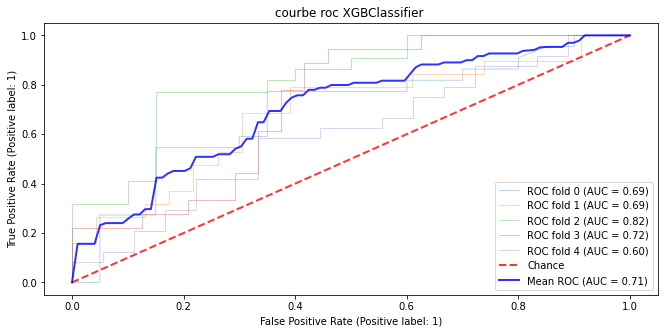

Accuracy: [0.69047619 0.66666667 0.76190476 0.66666667 0.57142857]
moy_accuracy: 0.67
precision: [0.69565217 0.61904762 0.83333333 0.59090909 0.66666667]
moy_precision: 0.68
sensibilité : [0.72727273 0.68421053 0.68181818 0.72222222 0.5       ]
moy_sensibilité: 0.66
spécificité : [0.65       0.65217391 0.85       0.625      0.66666667]
moy_spécificité: 0.69
MCC : [0.3785655  0.33485541 0.53671984 0.34405118 0.16666667]
MCC: 0.35
balanced_accuracy : [0.68863636 0.66819222 0.76590909 0.67361111 0.58333333]
balanced_accuracy: 0.68
roc_auc : [0.69431818 0.68649886 0.825      0.72453704 0.60185185]
roc_auc: 0.71
cohen_kappa_scorec : [0.37813212 0.33333333 0.52702703 0.33783784 0.16      ]
cohen_kappa_scorec: 0.35
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

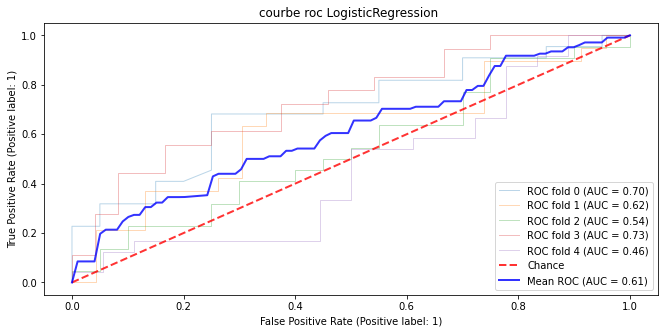

Accuracy: [0.69047619 0.61904762 0.5        0.66666667 0.42857143]
moy_accuracy: 0.58
precision: [0.73684211 0.58823529 0.52       0.61111111 0.5       ]
moy_precision: 0.59
sensibilité : [0.63636364 0.52631579 0.59090909 0.61111111 0.33333333]
moy_sensibilité: 0.54
spécificité : [0.75       0.69565217 0.4        0.70833333 0.55555556]
moy_spécificité: 0.62
MCC : [ 0.38768756  0.22507982 -0.00924995  0.31944444 -0.1132277 ]
MCC: 0.16
balanced_accuracy : [0.69318182 0.61098398 0.49545455 0.65972222 0.44444444]
balanced_accuracy: 0.58
roc_auc : [0.69659091 0.60183066 0.52954545 0.72916667 0.45601852]
roc_auc: 0.60
cohen_kappa_scorec : [ 0.38374718  0.22401848 -0.00915332  0.31944444 -0.10526316]
cohen_kappa_scorec: 0.16
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

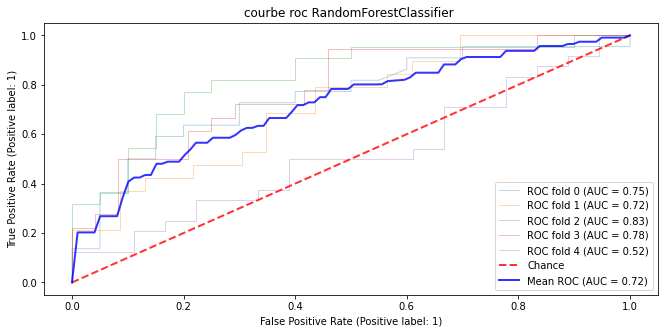

Accuracy: [0.69047619 0.5952381  0.78571429 0.69047619 0.47619048]
moy_accuracy: 0.65
precision: [0.70833333 0.58823529 0.71428571 0.63157895 0.61904762]
moy_precision: 0.65
sensibilité : [0.77272727 0.52631579 0.68181818 0.72222222 0.45833333]
moy_sensibilité: 0.63
spécificité : [0.65       0.65217391 0.8        0.70833333 0.44444444]
moy_spécificité: 0.65
MCC : [0.37924778 0.17951966 0.52727273 0.33028913 0.        ]
MCC: 0.28
balanced_accuracy : [0.73636364 0.58924485 0.76363636 0.66666667 0.52083333]
balanced_accuracy: 0.66
roc_auc : [0.74204545 0.73455378 0.83409091 0.78240741 0.53009259]
roc_auc: 0.72
cohen_kappa_scorec : [0.37528604 0.17931034 0.52272727 0.46896552 0.        ]
cohen_kappa_scorec: 0.31
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

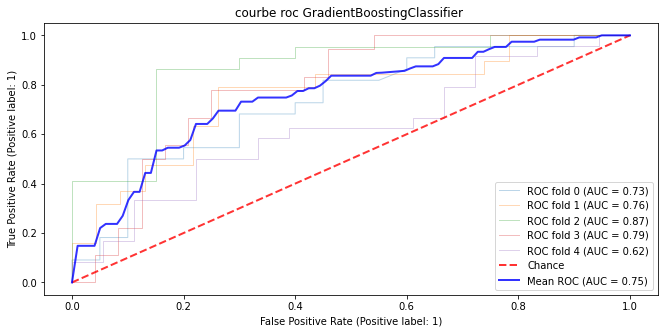

Accuracy: [0.64285714 0.71428571 0.78571429 0.69047619 0.5952381 ]
moy_accuracy: 0.69
precision: [0.65217391 0.70588235 0.84210526 0.60869565 0.70588235]
moy_precision: 0.70
sensibilité : [0.68181818 0.63157895 0.72727273 0.77777778 0.5       ]
moy_sensibilité: 0.66
spécificité : [0.6        0.7826087  0.85       0.625      0.72222222]
moy_spécificité: 0.72
MCC : [0.28278387 0.4199943  0.57925082 0.40046693 0.22404481]
MCC: 0.38
balanced_accuracy : [0.64090909 0.70709382 0.78863636 0.70138889 0.61111111]
balanced_accuracy: 0.69
roc_auc : [0.73068182 0.75514874 0.86590909 0.78703704 0.62268519]
roc_auc: 0.75
cohen_kappa_scorec : [0.28246014 0.41801386 0.57336343 0.38926174 0.21192053]
cohen_kappa_scorec: 0.38
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

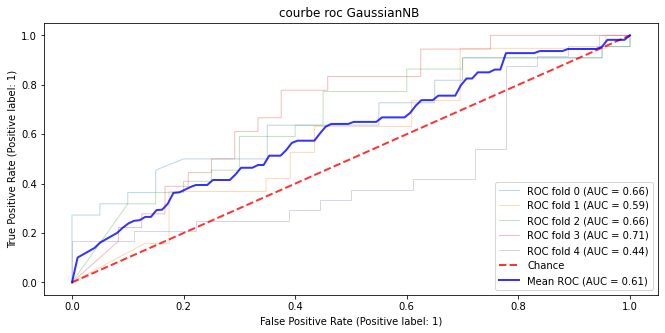

Accuracy: [0.61904762 0.5952381  0.61904762 0.64285714 0.4047619 ]
moy_accuracy: 0.58
precision: [0.65       0.6        0.60714286 0.63636364 0.46666667]
moy_precision: 0.59
sensibilité : [0.59090909 0.31578947 0.77272727 0.38888889 0.29166667]
moy_sensibilité: 0.47
spécificité : [0.65       0.82608696 0.45       0.83333333 0.55555556]
moy_spécificité: 0.66
MCC : [ 0.24090909  0.16579674  0.23596995  0.25012216 -0.15778821]
MCC: 0.15
balanced_accuracy : [0.62045455 0.57093822 0.61136364 0.61111111 0.42361111]
balanced_accuracy: 0.57
roc_auc : [0.6625     0.58695652 0.66136364 0.70833333 0.44444444]
roc_auc: 0.61
cohen_kappa_scorec : [ 0.239819    0.14797136  0.22580645  0.23357664 -0.14379085]
cohen_kappa_scorec: 0.14
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

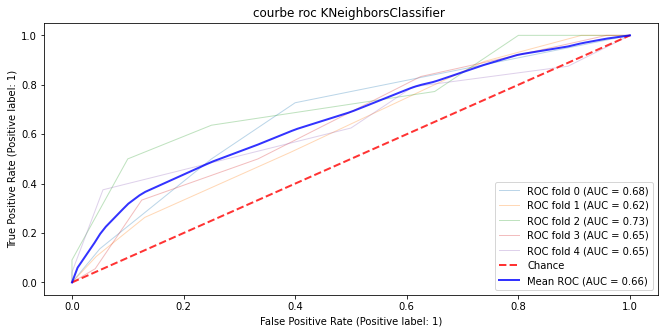

Accuracy: [0.66666667 0.57142857 0.69047619 0.5952381  0.57142857]
moy_accuracy: 0.62
precision: [0.66666667 0.52631579 0.73684211 0.52941176 0.625     ]
moy_precision: 0.62
sensibilité : [0.72727273 0.52631579 0.63636364 0.5        0.625     ]
moy_sensibilité: 0.60
spécificité : [0.6        0.60869565 0.75       0.66666667 0.5       ]
moy_spécificité: 0.63
MCC : [0.33028913 0.13501144 0.38768756 0.16803361 0.125     ]
MCC: 0.23
balanced_accuracy : [0.66363636 0.56750572 0.69318182 0.58333333 0.5625    ]
balanced_accuracy: 0.61
roc_auc : [0.67727273 0.6201373  0.72954545 0.64583333 0.64814815]
roc_auc: 0.66
cohen_kappa_scorec : [0.32876712 0.13501144 0.38374718 0.16783217 0.125     ]
cohen_kappa_scorec: 0.23


In [31]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5) }
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe4, Y)):
         clf.fit( x_rfe4.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe4.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe4, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe4, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe4, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe4, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe4, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# Gradientboosting

In [32]:
rfecv5 = RFECV(GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=1, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1),cv=StratifiedKFold(10))
rfecv5.fit(X,Y)
# check the support
rfecv5.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False,  True, False, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,

In [33]:
# name wise features and count
feature_selected5 =  X.columns[rfecv5.get_support()]
feature_selected5

Index(['X_long', 'Y_lat', 'Bovins', 'Caprins', 'Ovins', 'Equides',
       'VarT_ann_IRM', 'Min_IRM', 'Ph2_IRM', 'Amp2_TempJ', 'Moy_TempN',
       'Amp1_TempN', 'Min_TempN', 'Max_TempN', 'Ph3_TempN', 'Var_TempN',
       'Amp3_NDVI', 'VarT_ann_NDVI', 'VarT_cy_NDVI', 'Min_NDVI', 'Ph3_NDVI',
       'Amp1_EVI', 'Amp2_EVI', 'Amp3_EVI', 'VarT_ann_EVI', 'VarT_bi_EVI',
       'VarT_cy_EVI', 'Min_EVI', 'Max_EVI', 'Ph3_EVI', 'Ret_eau',
       'ProfAbs_Sub', 'CEC', 'Sol_Carbone', 'Sol_Carbone_terreFine',
       'Sol_pH_KCL', 'Sol_Limon', 'Sol_Sable', 'Elev_Max', 'Elev_sd',
       'Geom_Shan', 'Geom_unif', 'Rugosite_Moyenne', 'Pente_Moyenne',
       'Pente_Min', 'IPT_Min', 'IPT_sd', 'IR_Moy', 'RV_Max', 'RV_Med',
       'RV_Min', 'RV_Moy', 'Bio_Tj_Moy', 'Isoth', 'Bio_Saison', 'Bio_Thum_Moy',
       'Bio_Tfr_Moy', 'Bio_Pre_Ann', 'Bio_Pre_hum', 'Bio_Pre_Saison',
       'Bio_Pre_Qch', 'Bio_Pre_Qfr', 'Prec_Janv', 'Prec_Nov', 'Rad_Janv',
       'Rad_Avril', 'Rad_Juin', 'Rad_Aout', 'Rad_Sept', 'Rad_Nov', 

In [34]:
 x_rfe5=X[feature_selected5]

In [35]:
 x_rfe5

,X_long,Y_lat,Bovins,Caprins,Ovins,Equides,VarT_ann_IRM,Min_IRM,Ph2_IRM,Amp2_TempJ,Moy_TempN,Amp1_TempN,Min_TempN,Max_TempN,Ph3_TempN,Var_TempN,Amp3_NDVI,VarT_ann_NDVI,VarT_cy_NDVI,Min_NDVI,Ph3_NDVI,Amp1_EVI,Amp2_EVI,Amp3_EVI,VarT_ann_EVI,VarT_bi_EVI,VarT_cy_EVI,Min_EVI,Max_EVI,Ph3_EVI,Ret_eau,ProfAbs_Sub,CEC,Sol_Carbone,Sol_Carbone_terreFine,Sol_pH_KCL,Sol_Limon,Sol_Sable,Elev_Max,Elev_sd,...,RV_Max,RV_Med,RV_Min,RV_Moy,Bio_Tj_Moy,Isoth,Bio_Saison,Bio_Thum_Moy,Bio_Tfr_Moy,Bio_Pre_Ann,Bio_Pre_hum,Bio_Pre_Saison,Bio_Pre_Qch,Bio_Pre_Qfr,Prec_Janv,Prec_Nov,Rad_Janv,Rad_Avril,Rad_Juin,Rad_Aout,Rad_Sept,Rad_Nov,Rad_Dec,Tmax_Janv,Tmax_Fev,Tmax_Juin,Tmax_Juill,Tmax_Aout,Tmax_Sept,Tmax_Nov,Tmin_Mars,Vap_Juin,Vap_Juill,Vap_Sept,Vap_Oct,Vap_Nov,Vent_Mars,Vent_Mai,Vent_Sept,Vent_Oct
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.624435,47,2690,160,83,14436,102,14309,14561,151,3,2,2,3,1097,166,13,48,15,1,11,13,2839,2973,51,15.416667,4143,11.166667,70.000000,6.000000,63.416667,19.083333,64.833333,11,0.768013,...,0.000066,0.000025,0.000009,0.000033,7.125000,59.375002,172.263782,22.050000,18.383333,48,15,105.140599,21,19,2,4,14965,23683,25088,23115,20888,15480,13965,21.500000,21.799999,24.299999,25.200001,26.200001,26.500000,24.500000,15.7,1.91,2.07,2.16,2.02,1.71,6.1,7.2,6.3,5.4
1,-13.188370,27.132950,0.000214,0.063449,0.034352,0.040295,73,3350,33,126,14516,176,14311,14705,104,9,1,13,14,1076,171,34,16,4,12,3,15,2570,2648,197,13.750000,1828,12.750000,42.333333,2.500000,66.416667,17.500000,52.583333,77,0.484123,...,0.000019,0.000006,0.000002,0.000008,9.816667,55.461394,271.167506,20.200000,17.450000,29,8,77.394709,1,14,3,7,13864,22794,24129,22648,19999,13866,12663,21.900000,22.600000,27.100000,28.600000,29.700001,29.200001,25.100000,14.2,1.84,2.03,2.09,1.95,1.60,4.8,5.7,5.7,4.3
2,-13.188370,27.132950,0.000214,0.063449,0.034352,0.040295,73,3350,33,126,14516,176,14311,14705,104,9,1,13,14,1076,171,34,16,4,12,3,15,2570,2648,197,13.750000,1828,12.750000,42.333333,2.500000,66.416667,17.500000,52.583333,77,0.484123,...,0.000019,0.000006,0.000002,0.000008,9.816667,55.461394,271.167506,20.200000,17.450000,29,8,77.394709,1,14,3,7,13864,22794,24129,22648,19999,13866,12663,21.900000,22.600000,27.100000,28.600000,29.700001,29.200001,25.100000,14.2,1.84,2.03,2.09,1.95,1.60,4.8,5.7,5.7,4.3
3,-13.167180,27.157730,0.000000,0.000000,0.000000,0.379107,18,2350,185,115,14526,182,14309,14719,112,9,2,1,1,1049,123,85,71,6,1,1,2,2043,2310,56,15.666667,6537,12.750000,45.166667,3.000000,64.666667,13.916667,73.333333,57,5.418429,...,0.000689,0.000403,0.000150,0.000396,9.616666,54.952379,269.473410,20.500000,17.750000,26,8,79.471941,1,13,3,6,13863,22726,23963,22619,19925,13811,12635,22.000000,22.799999,27.299999,28.700001,29.900000,29.400000,25.299999,14.6,1.88,2.07,2.13,1.99,1.63,5.0,5.4,5.6,4.2
4,-13.207000,27.165000,0.000000,0.000000,0.000000,0.299265,44,1920,202,121,14489,156,14294,14660,109,8,1,0,1,1076,39,89,12,17,7,0,7,2363,2529,395,11.750000,416,18.000000,52.333333,2.250000,65.000000,20.750000,50.500000,70,1.434780,...,0.000476,0.000084,0.000018,0.000118,9.883333,55.838041,269.102032,20.400000,17.666667,28,8,80.226951,1,14,3,7,13834,22765,24059,22580,19981,13810,12631,22.100000,22.799999,27.299999,28.799999,29.900000,29.400000,25.299999,14.3,1.87,2.06,2.12,1.98,1.63,5.1,5.8,5.7,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,11.136305,8.974447,27.155428,0.614620,66,1480,123,105,14246,382,13907,14676,389,32,21,71,78,1261,370,646,237,109,55,7,64,3800,5323,386,13.583333,1446,21.166667,175.083333,16.583333,54.500000,33.500000,34.416667,635,2.598076,...,0.001350,0.000583,0.000195,0.000651,9.391667,36.686198,576.137048,10.650000,9.983333,836,151,87.607802,9,429,

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

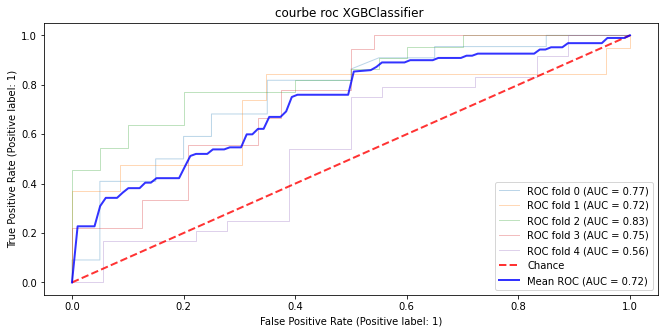

Accuracy: [0.69047619 0.61904762 0.76190476 0.66666667 0.52380952]
moy_accuracy: 0.65
precision: [0.71428571 0.58823529 0.8        0.58333333 0.61111111]
moy_precision: 0.66
sensibilité : [0.68181818 0.52631579 0.72727273 0.77777778 0.45833333]
moy_sensibilité: 0.63
spécificité : [0.7        0.69565217 0.8        0.58333333 0.61111111]
moy_spécificité: 0.68
MCC : [0.38138504 0.22507982 0.52727273 0.36111111 0.06944444]
MCC: 0.31
balanced_accuracy : [0.69090909 0.61098398 0.76363636 0.68055556 0.53472222]
balanced_accuracy: 0.66
roc_auc : [0.76704545 0.7208238  0.83409091 0.74768519 0.55555556]
roc_auc: 0.73
cohen_kappa_scorec : [0.38095238 0.22401848 0.52488688 0.34666667 0.06666667]
cohen_kappa_scorec: 0.31
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

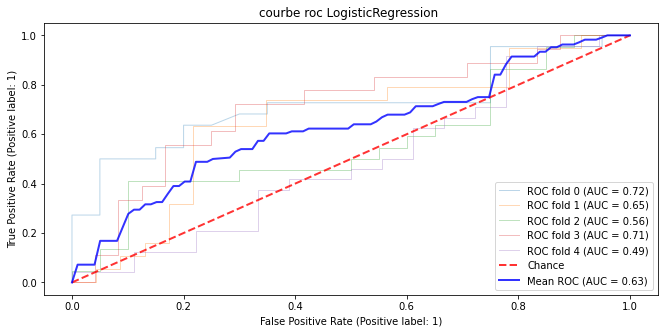

Accuracy: [0.57142857 0.64285714 0.52380952 0.69047619 0.45238095]
moy_accuracy: 0.58
precision: [0.57142857 0.6        0.55555556 0.61904762 0.52380952]
moy_precision: 0.57
sensibilité : [0.72727273 0.63157895 0.45454545 0.72222222 0.45833333]
moy_sensibilité: 0.60
spécificité : [0.4        0.65217391 0.6        0.66666667 0.44444444]
moy_spécificité: 0.55
MCC : [ 0.13483997  0.28278387  0.05504819  0.38490018 -0.09622504]
MCC: 0.15
balanced_accuracy : [0.56363636 0.64187643 0.52727273 0.69444444 0.45138889]
balanced_accuracy: 0.58
roc_auc : [0.72159091 0.65217391 0.56136364 0.70833333 0.48611111]
roc_auc: 0.63
cohen_kappa_scorec : [ 0.12903226  0.28246014  0.05405405  0.38095238 -0.0952381 ]
cohen_kappa_scorec: 0.15
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

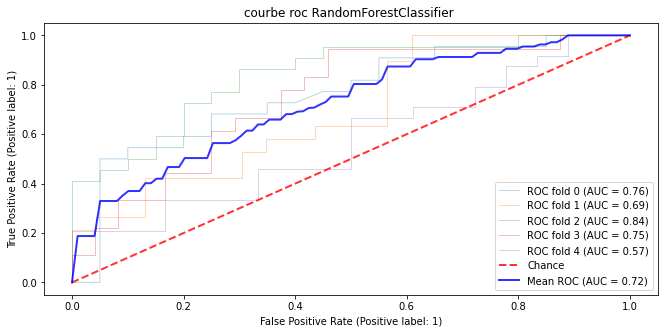

Accuracy: [0.66666667 0.57142857 0.73809524 0.69047619 0.5       ]
moy_accuracy: 0.63
precision: [0.69230769 0.57894737 0.7826087  0.60869565 0.55      ]
moy_precision: 0.64
sensibilité : [0.68181818 0.57894737 0.68181818 0.66666667 0.41666667]
moy_sensibilité: 0.61
spécificité : [0.55       0.65217391 0.75       0.66666667 0.61111111]
moy_spécificité: 0.65
MCC : [ 0.37924778  0.17951966  0.38138504  0.38490018 -0.04128614]
MCC: 0.26
balanced_accuracy : [0.66136364 0.58924485 0.73863636 0.72222222 0.5       ]
balanced_accuracy: 0.64
roc_auc : [0.75340909 0.67963387 0.81818182 0.74074074 0.53240741]
roc_auc: 0.70
cohen_kappa_scorec : [0.37813212 0.23112128 0.56750572 0.52702703 0.0952381 ]
cohen_kappa_scorec: 0.36
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

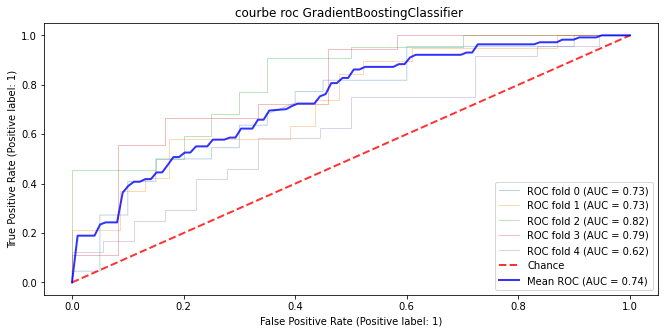

Accuracy: [0.66666667 0.71428571 0.69047619 0.66666667 0.5952381 ]
moy_accuracy: 0.67
precision: [0.66666667 0.73333333 0.76470588 0.59090909 0.68421053]
moy_precision: 0.69
sensibilité : [0.72727273 0.57894737 0.59090909 0.72222222 0.54166667]
moy_sensibilité: 0.63
spécificité : [0.6        0.82608696 0.8        0.625      0.66666667]
moy_spécificité: 0.70
MCC : [0.33028913 0.42073151 0.39774767 0.34405118 0.20713807]
MCC: 0.34
balanced_accuracy : [0.66363636 0.70251716 0.69545455 0.67361111 0.60416667]
balanced_accuracy: 0.67
roc_auc : [0.72840909 0.72997712 0.82272727 0.79166667 0.625     ]
roc_auc: 0.74
cohen_kappa_scorec : [0.32876712 0.41258741 0.38651685 0.33783784 0.20134228]
cohen_kappa_scorec: 0.33
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

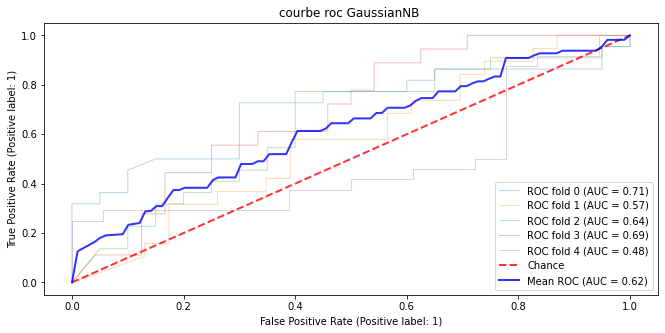

Accuracy: [0.61904762 0.5952381  0.61904762 0.66666667 0.47619048]
moy_accuracy: 0.60
precision: [0.66666667 0.6        0.60714286 0.66666667 0.5625    ]
moy_precision: 0.62
sensibilité : [0.54545455 0.31578947 0.77272727 0.44444444 0.375     ]
moy_sensibilité: 0.49
spécificité : [0.7        0.82608696 0.45       0.83333333 0.61111111]
moy_spécificité: 0.68
MCC : [ 0.24771685  0.16579674  0.23596995  0.30429031 -0.01415346]
MCC: 0.19
balanced_accuracy : [0.62272727 0.57093822 0.61136364 0.63888889 0.49305556]
balanced_accuracy: 0.59
roc_auc : [0.70568182 0.57208238 0.63522727 0.68981481 0.4837963 ]
roc_auc: 0.62
cohen_kappa_scorec : [ 0.24324324  0.14797136  0.22580645  0.28985507 -0.01315789]
cohen_kappa_scorec: 0.18
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

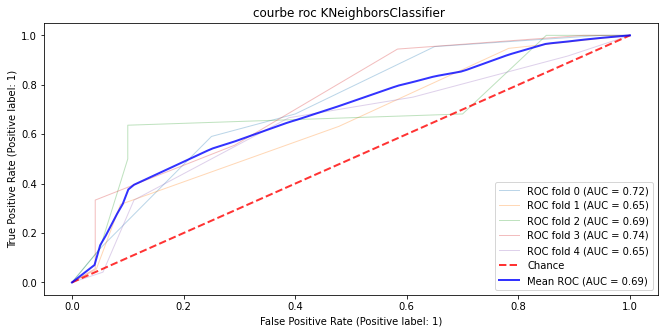

Accuracy: [0.64285714 0.57142857 0.76190476 0.64285714 0.64285714]
moy_accuracy: 0.65
precision: [0.65217391 0.52173913 0.875      0.58823529 0.69565217]
moy_precision: 0.67
sensibilité : [0.68181818 0.63157895 0.63636364 0.55555556 0.66666667]
moy_sensibilité: 0.63
spécificité : [0.6        0.52173913 0.9        0.70833333 0.61111111]
moy_spécificité: 0.67
MCC : [0.28278387 0.15331808 0.55161872 0.26605322 0.27618409]
MCC: 0.31
balanced_accuracy : [0.64090909 0.57665904 0.76818182 0.63194444 0.63888889]
balanced_accuracy: 0.65
roc_auc : [0.71931818 0.64645309 0.69090909 0.73842593 0.64583333]
roc_auc: 0.69
cohen_kappa_scorec : [0.28246014 0.1505618  0.52914798 0.26573427 0.27586207]
cohen_kappa_scorec: 0.30


In [36]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5) }
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe5, Y)):
         clf.fit( x_rfe5.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe5.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe5, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe5, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe5, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe5, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe5, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe5, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe5, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe5, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))